## Chapter 1
# The Simplest Lowpass Filter

### Definition of the Simplest Low-Pass

The simplest low-pass filter is given by the following _difference equation_:

$y(n) = x(n) + x(n - 1)$,

where $x(n)$ is the filter input amplitude at time (or sample) $n$, and $y(n)$ is the output amplitude at time $n$.

In [1]:
import numpy as np
# `xm1` is the filter's state, or current memory of the last output value.
# `M` is the size of the processing block
def simple_lp(x, xm1):
    M = x.size
    y = np.ndarray(M)
    y[0] = x[0] + xm1
    for n in range(1, M):
        y[n] = x[n] + x[n - 1]
    return y

In [2]:
x = np.arange(1, 11)
y = simple_lp(x, 0)

In [3]:
y # See example C program in Figure 1.4 on p6 of book

array([  1.,   3.,   5.,   7.,   9.,  11.,  13.,  15.,  17.,  19.])

### Sine-Wave Analysis

To find the frequency response of this filter experimentally, we could test the filter at each frequency separately. This is called _sine-wave analysis_.

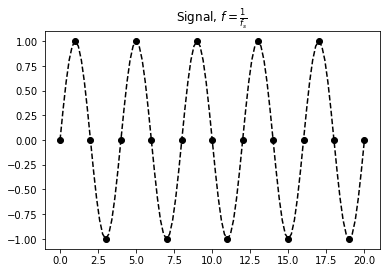

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

f = 1 / 4
t = np.linspace(0, 20, 101)
x_interp = np.sin(2 * np.pi * f * t)
x = x_interp[::5]
plt.plot(x, 'ok')
plt.plot(t, x_interp, '--k')
_ = plt.title('Signal, $f = \\frac{1}{f_s}$', y=1.02)

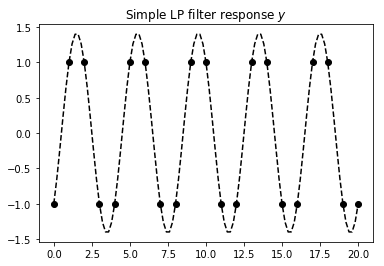

In [5]:
y = simple_lp(x, -1)
A = 2 ** 0.5 # amplitude response
phase = -np.pi / 4 # phase response
y_interp = A * np.sin(2 * np.pi * f * t + phase)
plt.plot(y, 'ok')
plt.plot(t, y_interp, '--k')
_ = plt.title('Simple LP filter response $y$')

### Amplitude Response

The amplitude response of the "simplest lowpass filter" is derived (in the book) as

$G(\omega) = 2\left|\cos{(\frac{\omega T}{2})}\right|$,

or, if we restrict $f$ to the range $\left|f\right| \leq \frac{f_s}{2}$,

$G(\omega) = 2\cos(\pi fT)$.

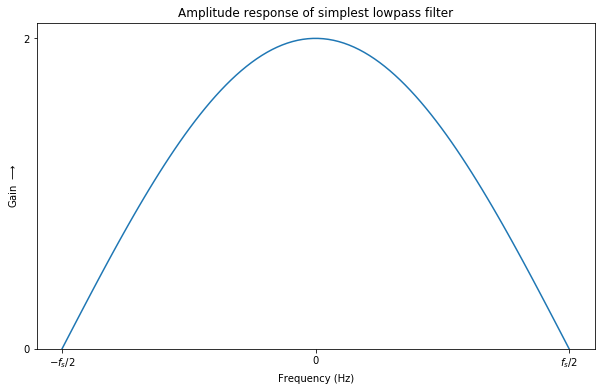

In [6]:
fs = 1
T = 1 / fs

frequency_range = np.linspace(-fs / 2, fs / 2, 100)
G = 2 * np.cos(np.pi * frequency_range * T)

plt.figure(figsize=(10, 6))
plt.plot(frequency_range, G)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain $\\longrightarrow$')
plt.ylim(0, 2.1)
plt.xticks([-fs / 2, 0, fs / 2], ['$-f_s/2$', 0, '$f_s/2$'])
plt.yticks([0, 2])
_ = plt.title('Amplitude response of simplest lowpass filter')

Let's verify that we get the gain we expirimentally found above, for $f = \frac{f_s}{4}$:

In [7]:
assert(2 * np.cos(np.pi * (1/4)) == A)

### Phase Response

The phase response of the "simplest lowpass filter" is derived (in the book) as

$\Theta(\omega) = -\omega T / 2 = -\pi f T$.

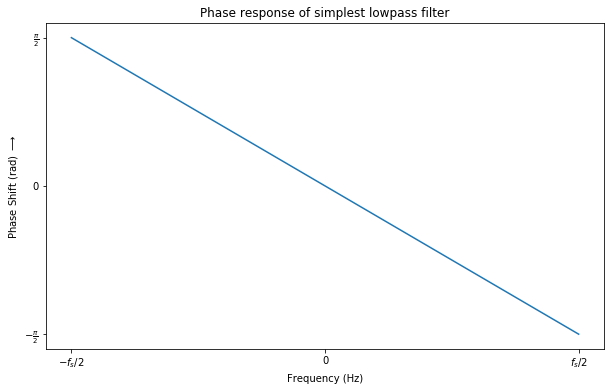

In [8]:
phase_response = -np.pi * frequency_range * T
plt.figure(figsize=(10, 6))
plt.plot(frequency_range, phase_response)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase Shift (rad) $\\longrightarrow$')
plt.xticks([-fs / 2, 0, fs / 2], ['$-f_s/2$', 0, '$f_s/2$'])
plt.yticks([-np.pi / 2, 0, np.pi / 2], ['$-\\frac{\\pi}{2}$', 0, '$\\frac{\\pi}{2}$'])
_ = plt.title('Phase response of simplest lowpass filter')

Just for fun, let's actually listen to the result of this filter on an audio sample.

In [9]:
import IPython
from scipy.io.wavfile import read as wavread

wav_fs, x = wavread('speech-male.wav')
x = x.astype(float)
x = x / x.max()
print('Original sample:')
IPython.display.Audio(x, rate=wav_fs)

Original sample:


In [10]:
print('Filtered sample:')
y = simple_lp(x, x[0])
IPython.display.Audio(y, rate=wav_fs)

Filtered sample:


It's hard to actually hear a difference here.  We need to apply this filter many times in order to hear a noticeable difference:

In [11]:
for _ in range(50):
    y = simple_lp(y, y[0])

Now the result will sound more like a typical lowpass filer:

In [12]:
y = y / y.max()
IPython.display.Audio(y, rate=wav_fs)

Let's compare the spectra of the original and filtered signals:

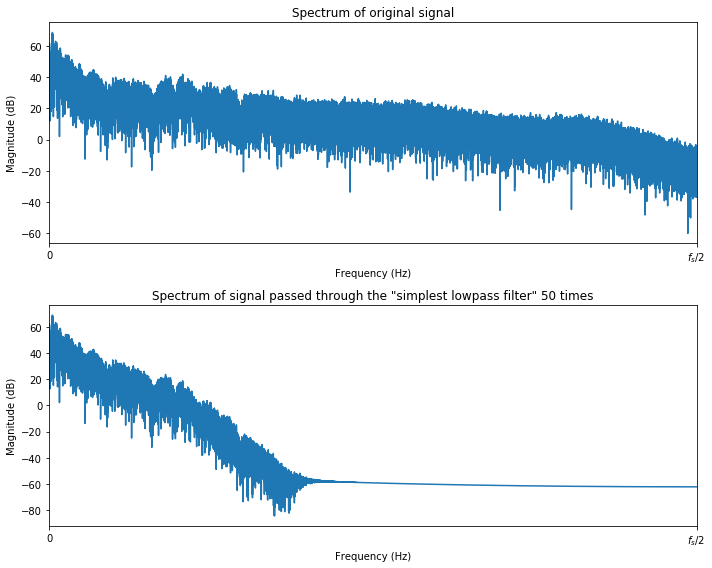

In [24]:
plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.plot(np.fft.fftfreq(x.size)[:x.size // 2], 20 * np.log10(np.abs(np.fft.fft(x)[:x.size // 2])))
plt.xlim(0, 1 / 2)
plt.xticks([0, 1 / 2], [0, '$f_s/2$'])
plt.title('Spectrum of original signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')

plt.subplot(212)
plt.plot(np.fft.fftfreq(y.size)[:y.size // 2], 20 * np.log10(np.abs(np.fft.fft(y)[:y.size // 2])))
plt.xlim(0, 1 / 2)
plt.xticks([0, 1 / 2], [0, '$f_s/2$'])
plt.title('Spectrum of signal passed through the "simplest lowpass filter" 50 times')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.tight_layout()

## Elementary Filter Theory Problems

**1) _General Amplitude and Phase in Deriving Frequency Response:_  
Repeat the derivation of Eq. (1.13) without the simplifications $A = 1$, $\phi = 0$. That is, let**

$x(n) = Ae^{j(\omega nT + \phi)}$,

**and find $y(n)$ from Eq. (1.1). Verify that the frequency response is the same.**

$\begin{align}
y(n) &= x(n) + x(n - 1)\\
&= Ae^{j(\omega nT + \phi)} + Ae^{j(\omega (n - 1)T + \phi)}\\
&= A(e^{j(\omega nT + \phi)} + e^{j(\omega (n - 1)T + \phi)})\\
&= A(e^{j\phi}e^{j\omega nT} + e^{j\phi}e^{j\omega (n - 1)T})\\
&= Ae^{j\phi}(e^{j\omega nT} + e^{j\omega (n - 1)T})\\
&= Ae^{j\phi}(e^{j\omega nT} + e^{j\omega nT}e^{-j\omega T})\\
&= Ae^{j\phi}e^{j\omega nT}(1 + e^{-j\omega T})\\
&= Ae^{j(\omega nT + \phi)}(1 + e^{-j\omega T})\\
&= x(n)H(e^{j\omega T})\\
\end{align}$

Finding the amplitude response:

$\begin{align}
G(\omega) &= \left|H(e^{j\omega T})\right|\\
&= \left|1 + e^{-j\omega T}\right|\\
&= \left|2\cos(\omega T/2)e^{-j\omega T/2}\right|\\
&= 2\left|\cos(\omega T/2)\right|\\
\end{align}$

$\begin{align}
\Theta(\omega) &= \angle{H(e^{j\omega T})}\\
&= \angle{\cos(\omega T/2)e^{-j\omega T/2}}\\
&= -\omega T/2\\
&= -\pi f T\\
\end{align}$


**2) _A Modification of the Simplest Low-Pass Filter:_  
Consider the filter**

**$v(n) = x(n) - x(n-1)$,**

**which is identical to Eq. (1.1) except that adjacent input samples are subtracted rather than added. Derive the amplitude response and the phase response. How has the response changed? Would you call this a low-pass filter, a high-pass filter, or something else?**

$\begin{align}
y(n) &= x(n) - x(n-1)\\
&= e^{j\omega nT} - e^{j\omega(n - 1)T}\\
&= e^{j\omega nT} - e^{j\omega nT}e^{-j\omega T}\\
&= (1 - e^{-j\omega T})e^{j\omega nT}\\
&= (1 - e^{-j\omega T})x(n)\\
&= (e^{j\omega T/2} - e^{-j\omega T/2})e^{-j\omega T/2}x(n)\\
&= 2j\sin(\omega T/2)e^{-j\omega T/2}x(n)\\
\end{align}$

Amplitude response:

$\begin{align}
G(\omega) &= \left|2j\sin(\omega T/2)e^{-j\omega T/2}\right|\\
&= 2\left|\sin(\omega T/2)\right|\\
&= 2\sin(\omega T/2) = 2\sin(\pi f T), 0 \leq f \leq f_s\\
\end{align}$

Phase response:

$\begin{align}
\Theta(\omega) &= \angle 2j\sin(\omega T/2)e^{-j\omega T/2}\\
&= \angle j - \angle e^{-j\omega T/2}\\
&= \frac{\pi}{2} -\frac{\omega T}{2}\\
&= \frac{\pi}{2} -\pi f T\\
\end{align}$

The phase response is simply offset by $\pi / 2$, and the amplitude response is also "shifted over" to the right, resulting in a highpass filter, as can be seen by plotting the amplitude response:

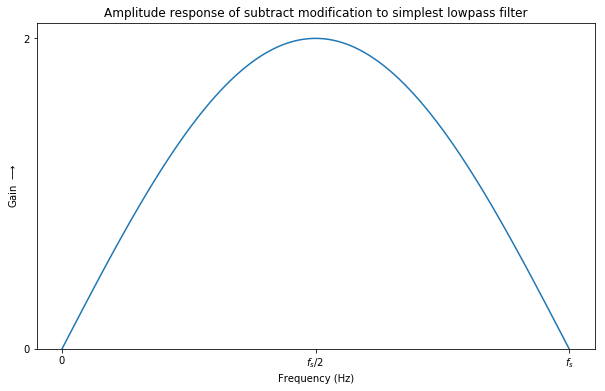

In [14]:
fs = 1
T = 1 / fs

frequency_range = np.linspace(0, fs, 100)
G = 2 * np.sin(np.pi * frequency_range * T)

plt.figure(figsize=(10, 6))
plt.plot(frequency_range, G)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain $\\longrightarrow$')
plt.ylim(0, 2.1)
plt.xticks([0, fs / 2, fs], [0, '$f_s/2$', '$f_s$'])
plt.yticks([0, 2])
_ = plt.title('Amplitude response of subtract modification to simplest lowpass filter')

Note that even though this has the shape of a bandpass filter, its peak is centered at $f_s/2$, so any frequencies greater than that frequency are aliased to the range $[0, f_s / 2)$, which is a monotonically increasing range in the amplitude response.

Let's listen to the results to be sure the interpretation as a HP filter seems accurate:

In [15]:
def neg_simple_lp(x, xm1):
    M = x.size
    y = np.ndarray(M)
    y[0] = x[0] - xm1
    for n in range(1, M):
        y[n] = x[n] - x[n - 1]
    return y

In [16]:
IPython.display.Audio(neg_simple_lp(x, x[0]), rate=wav_fs)

**3) _Linear Phase Means Simple Waveform Delay:_  
Show that the phase response $\Theta(\omega) = -\omega T / 2$ obtained for Eq. 1.1 corresponds to a waveform delay of one-half sample ($T/2$ sec) at all frequencies**

One way to show this is to find the spectrum of a known signal, multiply the spectrum with a phasor with phase $-\omega T / 2$, take the IDFT of the result, and verify it has been shifted by one-half sample.

Essentially what this problem is asking is to prove the _shift theorem_ of the DFT,

$\fbox{$x(n-\Delta) \longleftrightarrow e^{-j\omega_k\Delta}X(\omega_k)$}$,

for the special case of $\Delta = T/2$.

(The following follows the steps of [this proof of the shift theorem](https://www.dsprelated.com/freebooks/mdft/Shift_Theorem.html)).

$\begin{align}
e^{j-w_kT/2}X(k) &= e^{-j2\pi (T/2) k/ N}\sum_\limits{m=0}^\limits{N-1}x(m)e^{-j2\pi mk/N}\\
&= \sum_\limits{m=0}^\limits{N-1}x(m)e^{-j2\pi km/N}e^{-j2\pi k(T/2) / N}\\
&= \sum_\limits{m=0}^\limits{N-1}x(m)e^{-j2\pi k(m+T/2)/N}\\
&= \sum_\limits{n=T/2}^\limits{N-1+T/2}x(n - T/2)e^{-j2\pi kn/N}\space\space\space(m = n - T/2)\\
&= \sum_\limits{n=0}^\limits{N-1}x(n - T/2)e^{-j2\pi kn/N}\\
&= \text{DFT}\left[x(n - T/2)\right]\\
\end{align}$

I must admit that the substitution step for $m = n - T/2$ above is a slight abuse, since $x$ indices are only defined for integers, but since the problem _requires_ indexing with fractional samples by definition, and since all the other steps are sound, I think it stands :)

**4) _Complex Numbers and Trigonometry:_  
Show how easy it is to derive the identities**

$\cos(a+b) = \cos(a)\cos(b) - \sin(a)\sin(b)\\
\sin(a+b) = \sin(a)\cos(b) + \cos(a)\sin(b)$

**by using Euler's identity and the formula**

$e^{j(a+b)} = e^{ja}e^{jb}$.

$\begin{align}
\cos(a+b) + j\sin(a+b) &=e^{j(a+b)}\\
&= e^{ja}e^{jb}\\
&= (\cos(a) + j\sin(a))(\cos(b) + j\sin(b))\\
&= \cos(a)\cos(b) + j\cos(a)\sin(b) + j\sin(a)\cos(b) - \sin(a)\sin(b)\\
&= (\cos(a)\cos(b) - \sin(a)\sin(b)) + j(\sin(a)\cos(b) + \cos(a)\sin(b))\\
\end{align}$

**How would you derive the $\cos(a+b)$ identity, say, if you did not know the answer and did not use complex numbers?**

I suppose you would reason about it geometrically, considering the projection of a sum of angles onto the x axis of the cartesian plane, and its relationship to similar triangles when projecting its consituent angles onto the x and y axes. I'm not sure if that's an extensive enough answer, but honeslty if I went further I would be looking up geometric proofs of the sum-of-angles identities and basically copying them.

**5) _Filters with Coefficients:_  
The analysis for Eq. (1.1) will work for a larger class of filters. Try to get the frequency response for the filter**

$y(n) = ax(n) - ax(n-2)$

**where $a$ is a constant but arbitrary gain. Plot the amplitude response $G(\omega)$. Would you call this a low-pass filter, a high-pass filter, or something else entirely? What is the effect on $G(\omega)$ when $a$ is changed? How does the phase response $\Theta(\omega)$ depend on $a$?**

$\begin{align}
y(n) &= ax(n) - ax(n-2)\\
&= ae^{j\omega nT} - ae^{j\omega(n - 2)T}\\
&= ae^{j\omega nT} - ae^{j\omega nT}e^{-j\omega 2T}\\
&= (1 - e^{-j\omega 2T})ae^{j\omega nT}\\
&= (1 - e^{-j\omega 2T})ax(n)\\
&= (e^{j\omega T} - e^{-j\omega T})e^{-j\omega T}ax(n)\\
&= 2j\sin(\omega T)e^{-j\omega T}ax(n)\\
\end{align}$

Amplitude response:

$\begin{align}
G(\omega) &= \left|2j\sin(\omega T)e^{-j\omega T}\right|\\
&= 2\left|\sin(\omega T)\right|\\
&= 2\sin(\omega T) = 2\sin(2\pi f T), 0 \leq f \leq f_s/2\\
\end{align}$

Phase response:

$\begin{align}
\Theta(\omega) &= \angle 2j\sin(\omega T)e^{-j\omega T}\\
&= \angle j - \angle e^{-j\omega T}\\
&= \frac{\pi}{2} -\omega T\\
&= \frac{\pi}{2} -2\pi f T\\
\end{align}$

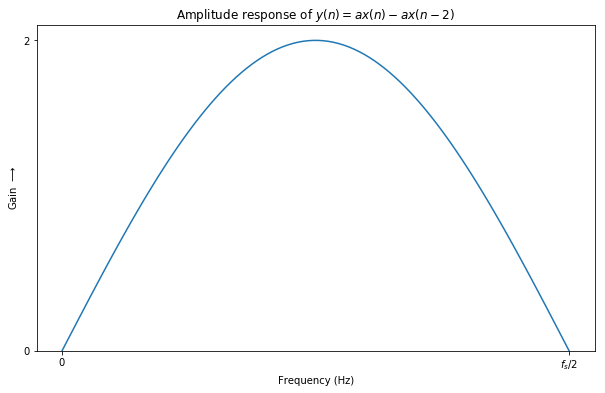

In [17]:
fs = 1
T = 1 / fs

frequency_range = np.linspace(0, fs / 2, 100)
G = 2 * np.sin(2 * np.pi * frequency_range * T)

plt.figure(figsize=(10, 6))
plt.plot(frequency_range, G)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain $\\longrightarrow$')
plt.ylim(0, 2.1)
plt.xticks([0, fs / 2], [0, '$f_s/2$'])
plt.yticks([0, 2])
_ = plt.title('Amplitude response of $y(n) = ax(n) - ax(n-2)$')

This looks like a bandpass filter! The frequencies "passed through" the most are the ones near $f_s / 4$. The amplitude and phase are not dependent on the amplitude, since they are both defined in relation to (ratio and subraction respectively) the original signal.

In [18]:
def simple_bp(x, xm1):
    M = x.size
    y = np.ndarray(M)
    y[0] = x[0] - xm1
    for n in range(1, M):
        y[n] = 10 * x[n] - 2 * 10 * x[n - 1]
    return y

In [19]:
y_bp = simple_bp(x, x[0])
for _ in range(4):
    y_bp = simple_bp(y_bp, y_bp[0])

In [20]:
IPython.display.Audio(y_bp, rate=wav_fs)